#### Импортируем все необходимые нам в дальнейшем библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [64]:
# основные параметры
alpha = 4
beta = 1.5

# генерируем 1000 значений с указанными параметрами бета-распределения
beta_rv = sts.beta(alpha, beta)
beta_dist = beta_rv.rvs(size=1000)

#### Создаём выборку объёма 1000; строим гистограмму выборки и теоретическую плотность распределения поверх неё

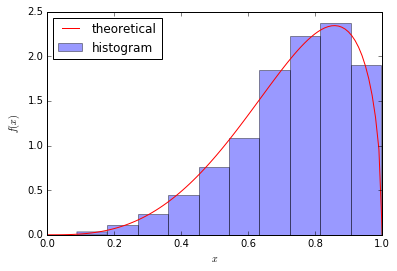

In [72]:
# гистограмма
plt.hist(beta_dist, normed=True, label='histogram', alpha=0.4)

# теоретическая кривая
x = np.linspace(0,1,100)
pdf = beta_rv.pdf(x)

plt.plot(x, pdf, color='red', label='theoretical')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc=0)

#### Создадим функцию для дальнейшего создания выборок объёма $n$, соответствующих им плотностей распределения средних значений и гистограммы.
Также вычислим значения параметров нормального распределения, с помощью которых приближаются выборочные средние.
$$\mu=\frac{\alpha}{\alpha+\beta},\sigma^2=\frac{\alpha\beta}{(\alpha+\beta+1)(\alpha+\beta)^2}$$

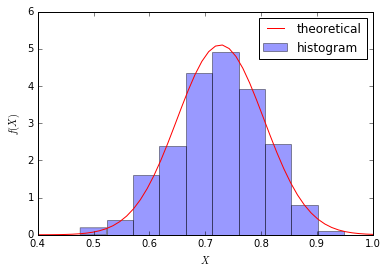

In [73]:
def n_hist(n):
    samples = [beta_rv.rvs(n) for i in range(1000)]
    means = [np.mean(sample) for sample in samples]  # выборочные средние
    
    # гистограмма
    plt.hist(means, normed=True, label="histogram", alpha=0.4)
    
    ex = alpha/(alpha+beta)
    # делим на n, т.к. нас интересуют средние величины (согласно ЦПТ)
    dev = np.sqrt((alpha*beta) / ((alpha+beta+1)*(alpha+beta)**2) / n)
    
    # плотность распределения средних значений
    x = np.linspace(0.4, 1)
    norm_rv = sts.norm(ex, dev)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, color="red", label="theoretical")
    plt.xlabel("$X$")
    plt.ylabel("$f(X)$")
    plt.legend(loc=0)
    plt.show()

#### Теперь применяем полученную функцию на различных значениях $n$: $5, 10, 50$

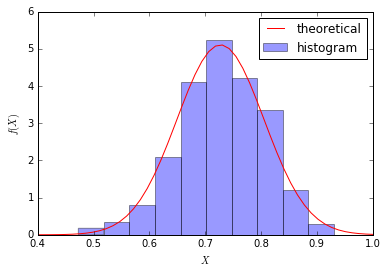

In [77]:
n_hist(5)

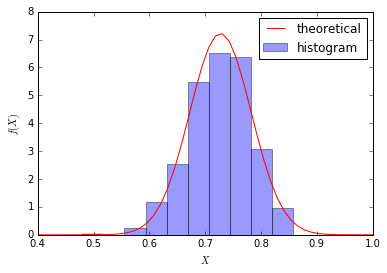

In [74]:
n_hist(10)

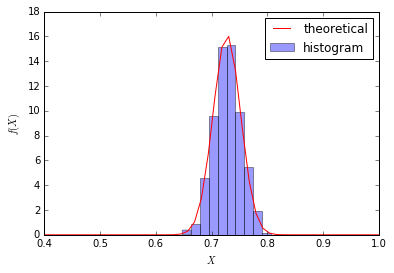

In [75]:
n_hist(50)

## Вывод:
### Практически полученные результаты на выборках довольно близки к теоретическим. По мере увеличения размера выборок точность тоже возрастает. 
### Таким образом мы можем искать оптимальный размер выборок, при котором отчётливо видны общие тенденции, но результат при этом не слишком сильно сглажен.